<a href="https://colab.research.google.com/github/Amaan310/CodSoft_Internship_Tasks/blob/main/TASK_3_CodSoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  TASK - 3 : SALES PREDICTION USING PYTHON

Author : Amaan

Domain : Data Science

Batch : August-2024

#IMPORTING ESSENTIAL LIBRARIES...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORTING / READING THE DATASET :

In [3]:
sales = pd.read_csv('/content/drive/MyDrive/advertising.csv')
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales.shape

(200, 4)

In [5]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


  **OBSERVATION :-**

*   Maximum Sale is 27 and the Minimum is 1.6

*   Average expenses spend is highest on TV

*   Average expenses spend is lowest on Radio







In [8]:
sales.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


**Since there are no null / missing values, We go ahead to data visualization for deriving more insights from the data.**

# DATA VISUALIZATION :

In [6]:
#  PLOTTING A SCATTER PLOT TO ANALYZE THE AMOUNT OF EXPENSE SPEND...

fig = go.Figure()

fig.add_trace(go.Scatter(x=sales['TV'], y=sales['Sales'], mode='markers', name='TV'))
fig.add_trace(go.Scatter(x=sales['Radio'], y=sales['Sales'], mode='markers', name='Radio'))
fig.add_trace(go.Scatter(x=sales['Newspaper'], y=sales['Sales'], mode='markers', name='Newspaper'))

fig.update_layout(title='Sales vs Advertising Channels',
                  xaxis_title='Advertising Expenses',
                  yaxis_title='Sales')

fig.show()


**Scatter Plot Observation :-**


---
* There is a significant increase in TV sales when advertising expenses are increased.

* But there is no guarantee of increased sales in case of Radio and Newspapers as the results are unpredictable.

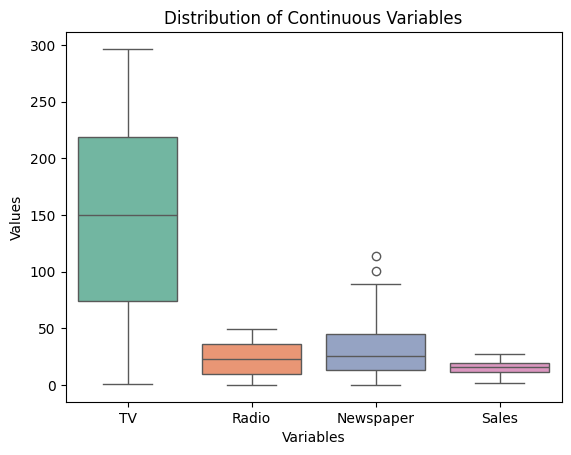

In [18]:
# Plotting Boxplot for showing the distribution of the variables...

sns.boxplot(sales.melt(value_vars=sales.columns), x='variable', y='value', hue='variable', palette='Set2', legend=False)
plt.title('Distribution of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()



**Box Plot Observation :-**

---
*   **TV :** Spending on TV advertising is the highest.

*   **Radio :** Spending on radio advertising is moderate.

* **Newspaper :** Newspaper advertising shows the lowest spending overall.

* **Sales :** There are some higher outliers indicating instances of exceptionally high sales.




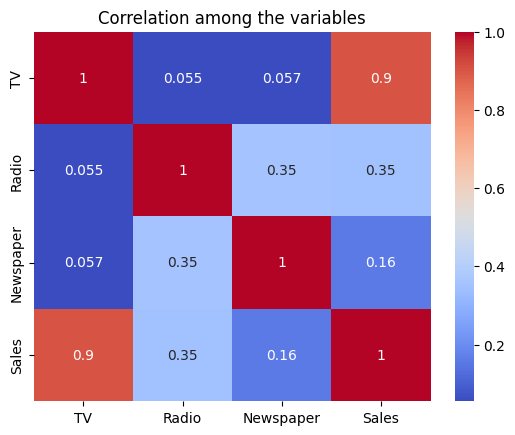

In [20]:
# Cheking the correlation between variables...

sns.heatmap(sales.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation among the variables')
plt.show()

**Summary of above heatmap :-**

---
*   **Strong Positive Correlation :** There's a strong positive correlation (0.78) between TV advertising expenses and sales. This suggests that higher spending on TV ads is generally associated with higher sales.

*   **Moderate Positive Correlation :** A moderate positive correlation (0.58) exists between radio advertising and sales, indicating a less pronounced but still positive relationship.

* **Weak Correlation :** The correlation between newspaper advertising and sales is weak (0.23), suggesting that newspaper ads might not be as effective in driving sales compared to TV and radio.



# DATA PREPARATION :

In [23]:
# Getting X and y...

X = sales.drop('Sales', axis=1)
y = sales['Sales']

In [45]:
# Splitting the data into training & testing part...

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(f'X Train shape : {X_train.shape}')
print(f'X Test shape : {X_test.shape}')
print(f'y Train shape : {y_train.shape}')
print(f'y Test shape : {y_test.shape}')

X Train shape : (160, 3)
X Test shape : (40, 3)
y Train shape : (160,)
y Test shape : (40,)


In [46]:
print(X_train)

        TV  Radio  Newspaper
16    67.8   36.6      114.0
186  139.5    2.1       26.6
144   96.2   14.8       38.9
121   18.8   21.7       50.4
80    76.4   26.7       22.3
..     ...    ...        ...
63   102.7   29.6        8.4
70   199.1   30.6       38.7
81   239.8    4.1       36.9
11   214.7   24.0        4.0
95   163.3   31.6       52.9

[160 rows x 3 columns]


In [47]:
print(y_train)

16     12.5
186    10.3
144    12.3
121     7.0
80     11.8
       ... 
63     14.0
70     18.3
81     17.3
11     17.4
95     16.9
Name: Sales, Length: 160, dtype: float64


In [48]:
print(X_test)

        TV  Radio  Newspaper
37    74.7   49.4       45.7
109  255.4   26.9        5.5
31   112.9   17.4       38.6
89   109.8   47.8       51.4
66    31.5   24.6        2.2
119   19.4   16.0       22.3
54   262.7   28.8       15.9
74   213.4   24.6       13.1
145  140.3    1.9        9.0
142  220.5   33.2       37.9
148   38.0   40.3       11.9
112  175.7   15.4        2.4
174  222.4    3.4       13.1
55   198.9   49.4       60.0
141  193.7   35.4       75.6
149   44.7   25.8       20.6
25   262.9    3.5       19.5
34    95.7    1.4        7.4
170   50.0   11.6       18.4
39   228.0   37.7       32.0
172   19.6   20.1       17.0
153  171.3   39.7       37.7
175  276.9   48.9       41.8
61   261.3   42.7       54.7
65    69.0    9.3        0.9
50   199.8    3.1       34.6
42   293.6   27.7        1.8
129   59.6   12.0       43.1
179  165.6   10.0       17.6
2     17.2   45.9       69.3
12    23.8   35.1       65.9
133  219.8   33.5       45.1
90   134.3    4.9        9.3
22    13.2   1

In [49]:
print(y_test)

37     14.7
109    19.8
31     11.9
89     16.7
66     11.0
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    17.1
174    16.5
55     23.7
141    19.2
149    10.1
25     17.0
34     11.9
170     8.4
39     21.5
172     7.6
153    16.0
175    27.0
61     24.2
65     11.3
50     16.4
42     20.7
129     9.7
179    17.6
2      12.0
12      9.2
133    19.6
90     14.0
22      5.6
41     17.1
32     13.2
125    10.6
196    14.0
158     7.3
180    15.5
Name: Sales, dtype: float64


# BUILDING THE MODEL :

In [50]:
# Import the necessary Pipeline class

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

preprocess = Pipeline(steps=[('scaler', StandardScaler())])

model = Pipeline(steps=[('preprocessor', preprocess),
                     ('regressor', LinearRegression())])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', LinearRegression())])

In [53]:
y_pred = model.predict(X_test)
print(f'Testing Accuracy : {round(100*r2_score(y_test, y_pred), 2)} %')

Testing Accuracy : 89.0 %


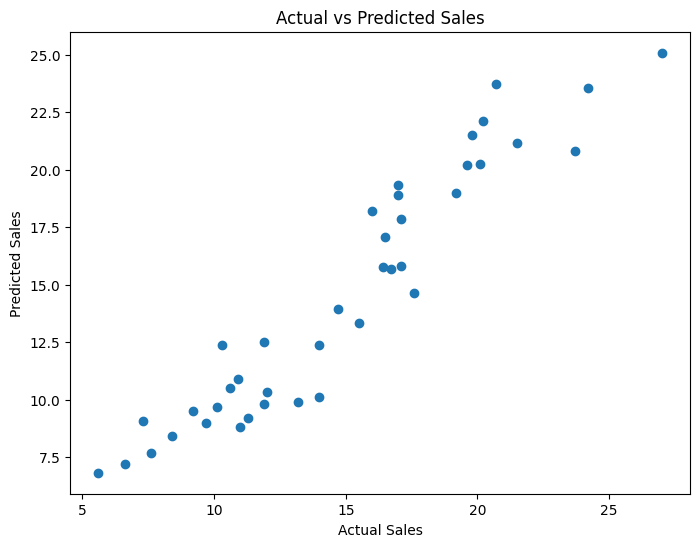

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

 **We Conclude by saying that the above mention solution is effectively predicts the sales using advertising.csv**